# Appendix, Training fails when training without event-dependent scaling factor

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from a.lib.dataloader import DataLoader
from a.lib.tools import dist, lpf

In [2]:
# Set figure aesthetics
sns.set_context("notebook")
sns.set_style("ticks")
fs = 14

## LIF

In [3]:
# Load data
data = DataLoader("./a/results/", "vanilla_training").merge()

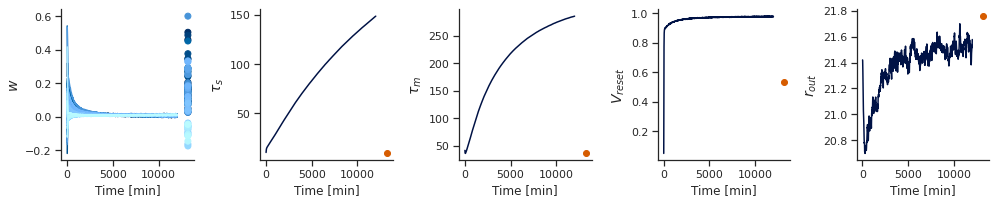

In [4]:
# Plot learning trajectories
qp = sns.color_palette(["#009e73","#e59c00", "#55b2e8", "#efe440", "#d65c00", "#0071b2", "#cc78a6", "#000000"])

sns.set_palette(['#001245', '#001447', '#001649', '#00184b', '#001a4d', '#001c50', '#001e52', '#002055',
                 '#002257', '#00245a', '#00265c', '#00285f', '#002b62', '#002d64', '#002f67', '#003169',
                 '#00336c', '#00356e', '#003771', '#003973', '#003c76', '#003e78', '#00407b', '#00427d',
                 '#004480', '#004783', '#004985', '#004b88', '#004d8a', '#00508d', '#00528f', '#005492',
                 '#005795', '#005997', '#005b9a', '#005e9c', '#00609f', '#0062a2', '#0065a4', '#0067a7',
                 '#0069a9', '#006cac', '#006eaf', '#0070b1', '#0773b4', '#1075b6', '#1677b9', '#1c79bb',
                 '#217bbd', '#257ec0', '#2980c2', '#2d82c5', '#3184c7', '#3487ca', '#3889cc', '#3b8bcf',
                 '#3e8dd1', '#4190d4', '#4492d6', '#4794d9', '#4a96db', '#4d99de', '#509be0', '#539de3',
                 '#56a0e5', '#59a2e8', '#5ba4ea', '#5ea7ed', '#61a9ef', '#64abf2', '#66aef4', '#69b0f7',
                 '#6cb3f9', '#6eb5fc', '#71b7fe', '#74baff', '#77bdff', '#7abfff', '#7dc2ff', '#80c5ff',
                 '#83c8ff', '#86caff', '#89cdff', '#8cd0ff', '#8fd2ff', '#92d5ff', '#94d8ff', '#97dbff',
                 '#9addff', '#9de0ff', '#a0e3ff', '#a3e5ff', '#a6e8ff', '#a8ebff', '#abeeff', '#aef0ff',
                 '#b1f3ff', '#b4f6ff', '#b7f9ff', '#bafbff'])
colors = sns.color_palette()

k = 0
i = 0

log_interval = 600000
experiment_length = (log_interval * data["ws"].shape[2]) / 1000 / 60
x = np.linspace(0., experiment_length, data["tau_s"][k].shape[0])

fig, axs = plt.subplots(1, 5, figsize=(14, 3))

axs[0].plot(x, data["ws"][k].T, zorder=1)
axs[1].plot(x, data["tau_s"][k], zorder=1)
axs[2].plot(x, data["tau_m"][k], zorder=1)
axs[3].plot(x, data["v_reset"][k], zorder=1)
axs[4].plot(x[1:], lpf(data["firing_rate"][k][1:], 0.1), zorder=1)

scatter_x = experiment_length * 1.1
axs[0].scatter([scatter_x] * 100, data["ws_target"][i], marker="o", color=colors, zorder=4)
axs[1].scatter(scatter_x, data["tau_s_target"][i], marker="o", color=qp[4], zorder=4)
axs[2].scatter(scatter_x, data["tau_m_target"][i], marker="o", color=qp[4], zorder=4)
axs[3].scatter(scatter_x, data["v_reset_target"][i], marker="o", color=qp[4], zorder=4)
axs[4].scatter(scatter_x, data["firing_rate_target"][i], marker="o", color=qp[4], zorder=4)
    
axs[0].set_ylabel("$w$", fontsize=fs)
axs[1].set_ylabel("$\\tau_s$", fontsize=fs)
axs[2].set_ylabel("$\\tau_m$", fontsize=fs)
axs[3].set_ylabel("$V_{reset}$", fontsize=fs)
axs[4].set_ylabel("$r_{out}$", fontsize=fs)


for i in range(5):
    sns.despine(ax=axs[i])
    axs[i].set_xlabel("Time [min]")
    axs[i].set_xticks([0., 5000., 10000.])
    fig.tight_layout()
    
fig.savefig("appendix-vanilla-training-lif.svg", pad_inches=0.)

## LRF

In [5]:
# Load data
data = DataLoader("./b/results/", "vanilla_training").merge()

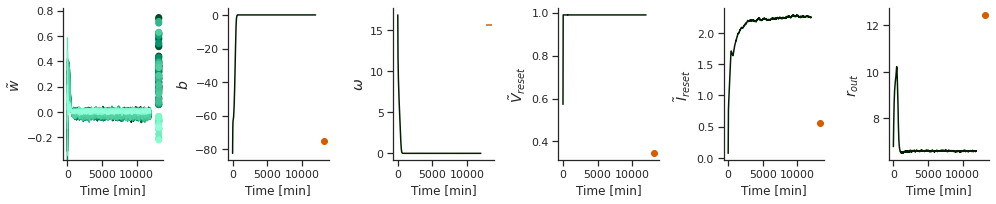

In [6]:
# Plot learning trajectories
qp = sns.color_palette(["#009e73","#e59c00", "#55b2e8", "#efe440", "#d65c00", "#0071b2", "#cc78a6", "#000000"])

sns.set_palette(['#001f00', '#002100', '#002200', '#002400', '#002600', '#002802', '#002a07', '#002c0a',
                 '#002e0e', '#003010', '#003212', '#003414', '#003616', '#003818', '#003a1a', '#003c1b',
                 '#003e1d', '#00411f', '#004321', '#004523', '#004724', '#004926', '#004b28', '#004d2a',
                 '#00502c', '#00522e', '#005430', '#005632', '#005834', '#005b36', '#005d38', '#005f3a',
                 '#00613c', '#00643e', '#006640', '#006842', '#006a44', '#006d46', '#006f48', '#00714a',
                 '#00744c', '#00764e', '#007850', '#007b53', '#007d55', '#007f57', '#008259', '#00845b',
                 '#00875d', '#008960', '#008b62', '#008e64', '#009066', '#009368', '#00956b', '#00976d',
                 '#009a6f', '#009c71', '#029f74', '#0ba176', '#12a378', '#18a67a', '#1ca87c', '#21aa7e',
                 '#25ad81', '#28af83', '#2cb185', '#2fb487', '#33b689', '#36b88c', '#39bb8e', '#3cbd90',
                 '#3fbf92', '#42c294', '#45c497', '#48c799', '#4ac99b', '#4dcb9d', '#50cea0', '#52d0a2',
                 '#55d3a4', '#58d5a7', '#5ad7a9', '#5ddaab', '#60dcad', '#62dfb0', '#65e1b2', '#67e4b4',
                 '#6ae6b7', '#6de9b9', '#6febbb', '#72edbe', '#74f0c0', '#77f2c2', '#79f5c5', '#7cf7c7',
                 '#7efac9', '#81fccc', '#84ffcf', '#91ffdb'])
colors = sns.color_palette()

k = 0
i = 0

log_interval = 600000
experiment_length = (log_interval * data["ws"].shape[2]) / 1000 / 60
x = np.linspace(0., experiment_length, data["b"][k].shape[0])

fig, axs = plt.subplots(1, 6, figsize=(14, 3))

axs[0].plot(x, data["ws"][k].T, zorder=1)
axs[1].plot(x, data["b"][k] * 1000, zorder=1)
axs[2].plot(x, data["omega"][k] * 1000 / (2 * np.pi), zorder=1)
axs[3].plot(x, data["v_reset"][k], zorder=1)
axs[4].plot(x, data["i_reset"][k], zorder=1)
axs[5].plot(x[1:], lpf(data["firing_rate"][k][1:], 0.1), zorder=1)

scatter_x = experiment_length * 1.1
axs[0].scatter([scatter_x] * 100, data["ws_target"][i], marker="o", color=colors, zorder=4)
axs[1].scatter(scatter_x, data["b_target"][i] * 1000, marker="o", color=qp[4], zorder=4)
axs[2].scatter(scatter_x, data["omega_target"][i] * 1000 / (2 * np.pi), marker="_", color=qp[4], zorder=4)
axs[3].scatter(scatter_x, data["v_reset_target"][i], marker="o", color=qp[4], zorder=4)
axs[4].scatter(scatter_x, data["i_reset_target"][i], marker="o", color=qp[4], zorder=4)
axs[5].scatter(scatter_x, data["firing_rate_target"][i], marker="o", color=qp[4], zorder=4)
    
axs[0].set_ylabel("$\\tilde{w}$", fontsize=fs)
axs[1].set_ylabel("$b$", fontsize=fs)
axs[2].set_ylabel("$\omega$", fontsize=fs)
axs[3].set_ylabel("$\\tilde{V}_{reset}$", fontsize=fs)
axs[4].set_ylabel("$\\tilde{I}_{reset}$", fontsize=fs)
axs[5].set_ylabel("$r_{out}$", fontsize=fs)

axs[0].set_ylim(-0.38, 0.82)

for i in range(6):
    sns.despine(ax=axs[i])
    axs[i].set_xticks([0., 5000., 10000.])
    axs[i].set_xlabel("Time [min]")
fig.tight_layout()

fig.savefig("appendix-vanilla-training-lrf.svg", pad_inches=0.)